In [2]:
# 引入所需要的全部包
from sklearn.model_selection import train_test_split # 数据划分的类

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [3]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path1='datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';', low_memory=False)  # 没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率）

# 查看数据
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
# 功率和电流之间的关系
X = df.iloc[:,2:4]
Y2 = df.iloc[:,5]

In [6]:
# X数据查看
X.head()

,Global_active_power,Global_reactive_power
0,4.216,0.418
1,5.360,0.436
2,5.374,0.498
3,5.388,0.502
4,3.666,0.528


In [7]:
# Y2数据查看
Y2.head()

0    18.4
1    23.0
2    23.0
3    23.0
4    15.8
Name: Global_intensity, dtype: float64

In [8]:
## 数据分割
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

In [9]:
print("X2的类型和形状：\n",type(X2_train), X2_train.shape)

X2的类型和形状：
 <class 'pandas.core.frame.DataFrame'> (800, 2)


In [10]:
# 将X和Y转换为矩阵的形式
X = np.mat(X2_train)
Y = np.mat(Y2_train).reshape(-1,1)

In [11]:
print(type(X), X.shape)

<class 'numpy.matrixlib.defmatrix.matrix'> (800, 2)


In [12]:
# 计算θ
theta = (X.T * X).I * X.T * Y
print(theta)

[[4.20324605]
 [1.36676171]]


In [13]:
# 对测试集合进行测试
y_hat = np.mat(X2_test) * theta

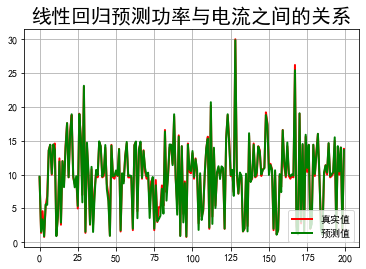

In [14]:
# 画图看看
#### 电流关系
t = np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()